In [2]:
import pandas
import seaborn as sns
import matplotlib as mat


# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

covid_2020_data = pandas.read_csv("covid19_countrywise_Data.csv")

covid_2020_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,07/09/2020,7,9,2020,74,2,Afghanistan,AF,AFG,38041757.0,Asia,1.048847
1,06/09/2020,6,9,2020,20,0,Afghanistan,AF,AFG,38041757.0,Asia,0.854324
2,05/09/2020,5,9,2020,16,0,Afghanistan,AF,AFG,38041757.0,Asia,1.077763
3,04/09/2020,4,9,2020,45,1,Afghanistan,AF,AFG,38041757.0,Asia,1.135594
4,03/09/2020,3,9,2020,38,3,Afghanistan,AF,AFG,38041757.0,Asia,1.272286
...,...,...,...,...,...,...,...,...,...,...,...,...
41205,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
41206,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
41207,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
41208,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [2]:
#Question #1: How has the populations of a country affected the amount of Covid-19?

#organizing the data to start from a descending and ascending order based on the population number
listInDescendingOrderPopulation = covid_2020_data.sort_values('popData2019', ascending=False)
listInAscendingOrderPopulation = covid_2020_data.sort_values('popData2019')

#getting the first row for each list, so I can have access to the top and bottom population country
topPopulation = listInDescendingOrderPopulation.head(1)
bottomPopulation = listInAscendingOrderPopulation.head(1)
print(topPopulation)
print(bottomPopulation)

#Breaking the data lists and only holding the case numbers and country name    
casesAndCountryDataAscend = listInAscendingOrderPopulation.loc[:,["cases","countriesAndTerritories"]]
casesAndCountryDataDescend = listInDescendingOrderPopulation.loc[:,["cases","countriesAndTerritories"]]

#searching through the lists and getting the total cases in the top and bottom population country
index = 0
bottomPopulationCasesTotal = 0
topPopulationCasesTotal = 0
while((casesAndCountryDataAscend['countriesAndTerritories'].iloc[index] == bottomPopulation['countriesAndTerritories']).bool()):
    bottomPopulationCasesTotal += casesAndCountryDataAscend['cases'].iloc[index]
    index += 1

index = 0
while((casesAndCountryDataDescend['countriesAndTerritories'].iloc[index] == topPopulation['countriesAndTerritories']).bool()):
    topPopulationCasesTotal += casesAndCountryDataDescend['cases'].iloc[index]
    index += 1

#finding the percentage of covid cases out of the country's population
percentageOfPeopleHaveCovidTopPop = topPopulationCasesTotal / topPopulation['popData2019']
percentageOfPeopleHaveCovidBottomPop = bottomPopulationCasesTotal / bottomPopulation['popData2019']

print(topPopulationCasesTotal, "/", topPopulation['popData2019'])
print(percentageOfPeopleHaveCovidBottomPop)
print(percentageOfPeopleHaveCovidTopPop)
#print(casesAndCountryDataAscend['countriesAndTerritories'].iloc[index] == bottomPopulation['countriesAndTerritories'])

#print(listInAscendingOrderPopulation.iloc[2])
#print(listInAscendingOrderPopulation['countriesAndTerritories'])





         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
8331  31/12/2019   31     12  2019     27       0                   China   

     geoId countryterritoryCode   popData2019 continentExp  \
8331    CN                  CHN  1.433784e+09         Asia   

      Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
8331                                                NaN           
          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
17191  03/04/2020    3      4  2020      0       0                Holy_See   

      geoId countryterritoryCode  popData2019 continentExp  \
17191    VA                  VAT        815.0       Europe   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
17191                                         613.496933           
90058 / 8331    1.433784e+09
Name: popData2019, dtype: float64
17191    0.014724
Name: popData2019, dtype: float64
8331    0.000063
Name: popData2019, dtype: float64


The countries with the higher population will most likely have a hgher probability of catching covid than the countries with a lower population. 

Evidence: Probabilty of catching covid in the least populated country, 1.433784 * 10^-9, which is extremely smaller than the probability of catching covid in the most populated country which is 0.063%.

In [4]:
#Question #2: Does population affect the probability of dying from Covid-19?

#Find the probability of dying in the most populated country, and the less populated country
#P(having covid & dying)
#P(Having covid) * P(dying)

#Finding the probability of having covid in the country with the highest population
deathAndCountryDataDescend = listInDescendingOrderPopulation.loc[:,["deaths","countriesAndTerritories"]]
index = 0
topPopulationDeathTotal = 0
while((deathAndCountryDataDescend['countriesAndTerritories'].iloc[index] == topPopulation['countriesAndTerritories']).bool()):
    topPopulationDeathTotal += deathAndCountryDataDescend['deaths'].iloc[index]
    index += 1

topProbabilityOfCovidAndDeath = percentageOfPeopleHaveCovidTopPop * (topPopulationDeathTotal / topPopulation['popData2019'])

print(topProbabilityOfCovidAndDeath)

#Finding the probability of having covid in the country with the lowest population
deathAndCountryDataAscend = listInAscendingOrderPopulation.loc[:,["deaths","countriesAndTerritories"]]
index = 0
bottomPopulationDeathTotal = 0
while((deathAndCountryDataAscend['countriesAndTerritories'].iloc[index] == bottomPopulation['countriesAndTerritories']).bool()):
    bottomPopulationDeathTotal += deathAndCountryDataAscend['deaths'].iloc[index]
    index += 1
    
bottomProbabilityOfCovidAndDeath = percentageOfPeopleHaveCovidBottomPop * (bottomPopulationDeathTotal / bottomPopulation['popData2019'])

print(bottomProbabilityOfCovidAndDeath)



8331    2.072126e-10
Name: popData2019, dtype: float64
17191    0.0
Name: popData2019, dtype: float64


Same as for the probability of catching covid between the most populated country and the least populated country. Dying from covid is higher in a more populated country, but they are both nearly 0, based on reported covid cases in 2020. 

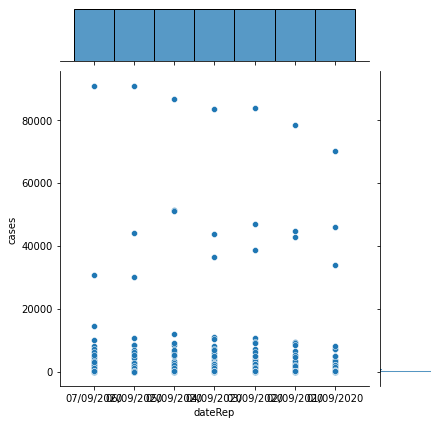

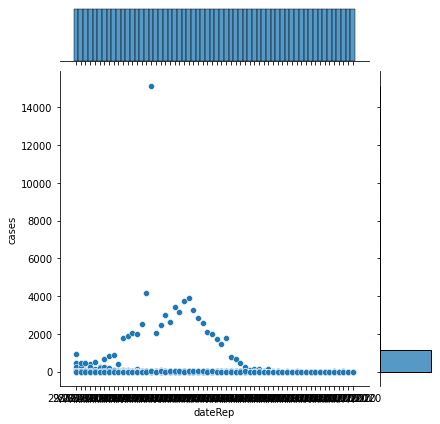

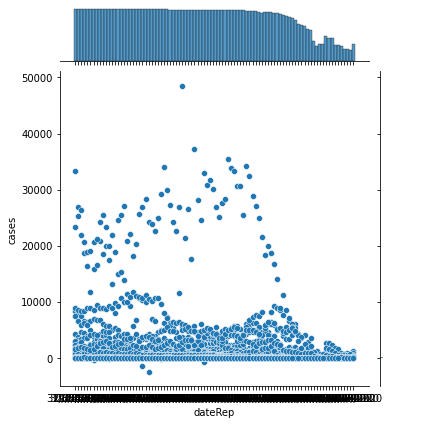

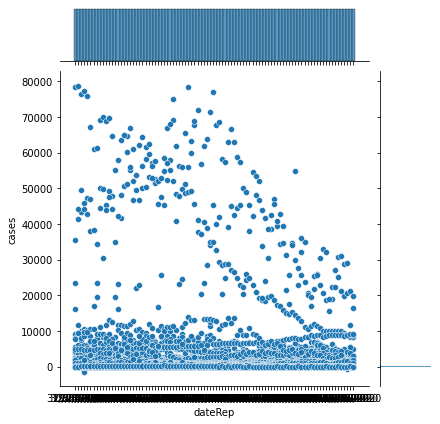

In [51]:
#Question #3: Does the year of the season affect the amount of Covid-19 cases?
#Come back to this question...
#Need to filter each season (fall, winter, spring, summer) and create a graph for each season and compare.
#graph the amount of covid cases and the dates on a bar graph to analyze them.
datesAndCasesData = covid_2020_data.loc[:,["dateRep","cases","month", "year"]]
filter_fallDates = datesAndCasesData[datesAndCasesData['month'] == 9]
filter_winterDates = datesAndCasesData[datesAndCasesData['month'] <= 2]
filter_springDates = datesAndCasesData[(datesAndCasesData['month'] >= 3) & (datesAndCasesData['month'] <= 5)]
filter_summerDates = datesAndCasesData[(datesAndCasesData['month'] >= 6) & (datesAndCasesData['month'] < 9)]

sns.jointplot(x = filter_fallDates['dateRep'], y = filter_fallDates['cases'], kind = 'scatter')
sns.jointplot(x = filter_winterDates['dateRep'], y = filter_winterDates['cases'], kind = 'scatter')
sns.jointplot(x = filter_springDates['dateRep'], y = filter_springDates['cases'], kind = 'scatter')
sns.jointplot(x = filter_summerDates['dateRep'], y = filter_summerDates['cases'], kind = 'scatter')


As seen, there are more cases in the summer than any other season. Although this may be a bit bias as covid started spreading during the year of 2020 and I don't have reports of the fall and winter in 2020 or in the following years. But in comparison of the Spring and in the Summer (which covid started spreading more rapidly) summer showcases more covid cases than in the spring. 

In [6]:
#Question #4: What is the probability of catching Covid-19 virus in a specific country?

#Country = United States
filter_USA = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'United_States_of_America']
numberOfCasesInUS = 0
populationOfUS = filter_USA['popData2019'].head(1)
for cases in filter_USA['cases']:
    numberOfCasesInUS += cases

probabilityOfCatchingCovidInUS = numberOfCasesInUS / populationOfUS 
print(numberOfCasesInUS, "/", populationOfUS, " = ")
probabilityOfCatchingCovidInUS 

6276421 / 39384    329064917.0
Name: popData2019, dtype: float64  = 


39384    0.019074
Name: popData2019, dtype: float64

The probability of catching covid in the United States during 2020 is 1.9074%.

<AxesSubplot:>

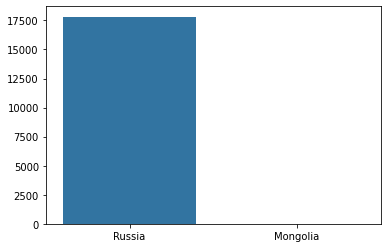

In [48]:
#Question 5: Does the amount of resources a specific country have affect the amount of death occuring?

#Russia is the most resourced country in the world
#Mongolia is one of the least resourced country in the world
#Creaing a barplot to compare the difference in deaths probability to see the difference in a resourced country and a non resourced country
filter_Russia_Mongolia = covid_2020_data[(covid_2020_data ['countriesAndTerritories'] == 'Russia') | (covid_2020_data['countriesAndTerritories'] == 'Mongolia')]

numberOfRussiaDeath = 0
numberOfMongoliaDeath = 0


index = 0
for country in filter_Russia_Mongolia['countriesAndTerritories']:
    if(country == 'Russia'):
        numberOfRussiaDeath += filter_Russia_Mongolia['deaths'].iloc[index]
    else:
        numberOfMongoliaDeath += filter_Russia_Mongolia['deaths'].iloc[index]
    
    index += 1

sns.barplot(x = ["Russia", "Mongolia"], y = [numberOfRussiaDeath, numberOfMongoliaDeath])
    



In comparison to the country with the most resources and the least resourced, it shows that it does not have any kind affect of the death count within the country or how many cases there are. Even with the most resource, every country is still doing the same with passing out vaccines and quarantining. The amount of resource just might determine the efficiency in handling the virus and the speed in recieving these resources. 

In [46]:
#Question #6: Does the amount of death affect which country recieves the vaccine first?

#China received approval for the vaccination in Dec 30, 2020
#United States received approval for the vaccination in August 31, 2021
#United Kingdom recived approval for the vaccination in Dec 2, 2020
#Afghanistan recived approval for the vaccination on March, 2021

#Already created filter USA data in question 4
filter_China_US_UK_Afghanistan = covid_2020_data[(covid_2020_data ['countriesAndTerritories'] == 'China') | (covid_2020_data['countriesAndTerritories'] == 'United_States_of_America') | (covid_2020_data['countriesAndTerritories'] == 'Afghanistan') | (covid_2020_data['countriesAndTerritories'] == 'United_Kingdom')]
filter_China = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'China']
#filter_UK = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'United_Kingdom']
#filter_Afghanistan = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'United_States_of_America']

numberOfChinaDeath = 0
numberOfUSDeath = 0
numberOfUKDeath = 0
numberOfAfghanistanDeath = 0

index = 0
for country in filter_China_US_UK_Afghanistan['countriesAndTerritories']:
    if(country == 'China'):
        numberOfChinaDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    elif(country == 'United_States_of_America'):
        numberOfUSDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    elif(country == 'United_Kingdom'):
        numberOfUKDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    else:
        numberOfAfghanistanDeath += filter_China_US_UK_Afghanistan['deaths'].iloc[index]
    index += 1
    
print(numberOfAfghanistanDeath)
print(numberOfUSDeath)
print(numberOfUKDeath)
print(numberOfChinaDeath)





1412
188941
41551
4730
Death Rate has no connection to the timing of the vaccination. It's dependent on the government, resources, and the scientists.


Death rate has no connection to the timing of recieving the vaccination. it's dependent onf te government, resources, and the scientists, high fast they can get things done and how demanding it is, also money is involved as well.

<AxesSubplot:xlabel='dateRep', ylabel='cases'>

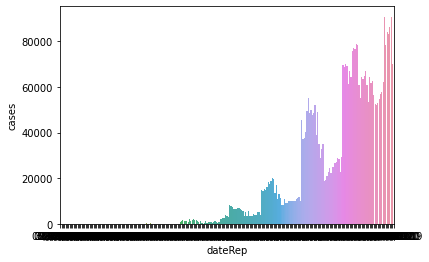

In [41]:
#Question 7: How does the vaccine affect the coronavirus and its deaths?
#Country = India

#Create a graph for India's cases and deaths (2 graphs - barplot)
filter_India = covid_2020_data[covid_2020_data['countriesAndTerritories'] == 'India'].sort_values('month', ascending=True)

sns.barplot(x = filter_India['dateRep'], y = filter_India['cases'])


<AxesSubplot:xlabel='dateRep', ylabel='deaths'>

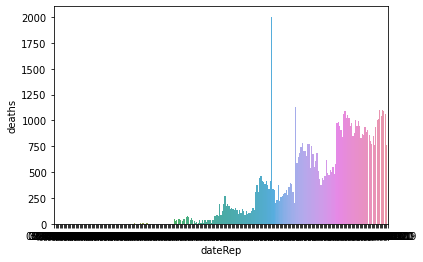

In [42]:
#Question 7 Continued.
#Barplot for India death as it didn't let me print two in one cell

sns.barplot(x = filter_India['dateRep'], y = filter_India['deaths'])

The vaccine has created some drops within the graph and stopped the spread of the virus and increase in deaths, but there has been other outliers that affected the number of cases and deaths to increase. 

In [43]:
#Question 8: What is the probability of catching covid and dying?
# P(Covid & Dying)
# = P(Covid) * P(Dying)

numberOfCovidCases = 0
numberOfDeath = 0
totalPopulationOfWorld = 7900000000000
for cases in covid_2020_data['cases']:
    numberOfCovidCases += cases

for death in covid_2020_data['deaths']:
    numberOfDeath += death

probabilityOfCovid_Death = (numberOfCovidCases / totalPopulationOfWorld) * (numberOfDeath / numberOfCovidCases)
probabilityOfCovid_Death



1.1256405063291138e-07

The probability of catching covid and dying from it out of the entire world in 2020 is 1.12564 * 10^-5 percent. It is extremely low in the comparison of the world's population, but will be extremely high if you would compare it to a household's population that has one or two affected of covid. 

In [44]:
#Question 9: Does a specific temperature affect catching covid?
#Hottest country in the world = "Lybia"
#Coldest country in the world = "Kazakhstan" passing after Antarctica 
filter_hottestCountry = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'Libya']
filter_coldestCountry = covid_2020_data[covid_2020_data ['countriesAndTerritories'] == 'Kazakhstan']

numberOfCasesInLibya = 0
numberOfCasesInKazakhstan = 0
libyaPopulation = filter_hottestCountry['popData2019'].head(1)
kazakhstanPopulation = filter_coldestCountry['popData2019'].head(1)
for cases in filter_hottestCountry['cases']:
    numberOfCasesInLibya += cases

for numberOfCases in filter_coldestCountry['cases']:
    numberOfCasesInKazakhstan += numberOfCases

probabilityOfCatchCovidInLibya = numberOfCasesInLibya / libyaPopulation
probabilityOfCatchCovidInKazakhstan = numberOfCasesInKazakhstan / kazakhstanPopulation

print(probabilityOfCatchCovidInLibya)
print(probabilityOfCatchCovidInKazakhstan)





22375    0.002619
Name: popData2019, dtype: float64
20529    0.00723
Name: popData2019, dtype: float64


Based off my research, temperature may have a slight affect on catching covid as one of the coldest countries has a probability of 0.723% of catching covid (in Kazakhstan). Then for one of the hottest countries (Libya), has a probability of 0.2619% of catching covid. 0.723% > 0.2619%, which means a colder temperature provides a higher chance of catching covid than in a hotter setting. 

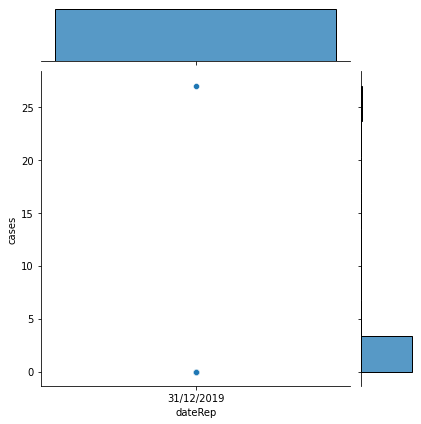

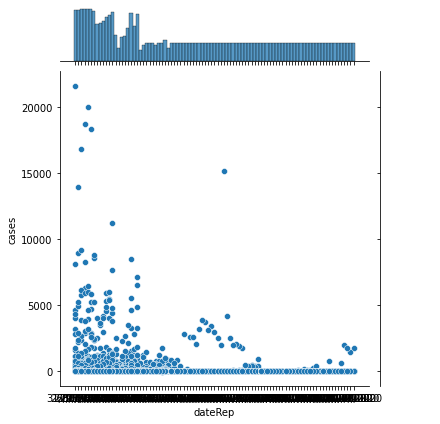

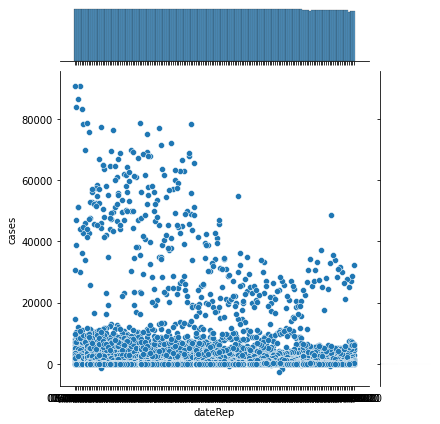

In [56]:
#Question 10: What has helped people survived covid?
#Before 2020 started cases
#Start of 2020 to quarantine cases
#Quarantine cases
#Create graphs throughout the events and compare to see if there were a difference in the number of cases
#This will allow us to identify which solution was helpful and which wasn't, or if there were outliers in the events.

#datesAndCasesData used from question 3
filter_before2020 = datesAndCasesData[datesAndCasesData['year'] == 2019].sort_values('month', ascending=False)
filter_betweenStart2020AndQuarantine = datesAndCasesData[(datesAndCasesData['month'] >= 1) & (datesAndCasesData['month'] <= 3) & (datesAndCasesData['year'] == 2020)].sort_values('month', ascending=False)
filter_quarantineTime = datesAndCasesData[(datesAndCasesData['month'] >= 4) & (datesAndCasesData['year'] == 2020)].sort_values('month', ascending=False)

sns.jointplot(x = filter_before2020['dateRep'], y = filter_before2020['cases'], kind = 'scatter')
sns.jointplot(x = filter_betweenStart2020AndQuarantine['dateRep'], y = filter_betweenStart2020AndQuarantine['cases'], kind = 'scatter')
sns.jointplot(x = filter_quarantineTime['dateRep'], y = filter_quarantineTime['cases'], kind = 'scatter')



In comparison to covid cases in 2019, before quarantine in 2020 and quarantine, quarantine has the most covid cases, but showcased a decline in the spread of the virus. This is similar to before quarantine, but with less cases.

In [4]:
#Machine Learning Algorithm 
#Creating an algorithm to find out if a country has 50% deaths of its cases

#Creating a function to check if the death rate over covid-19 cases of a country is more than 2.5%. 
def twoPointfive_PercentOrMore(country):
    countryCases = 0
    countryDeaths = 0
    filter_country = covid_2020_data[covid_2020_data['countriesAndTerritories'] == country]
    for cases in filter_country['cases']:
        countryCases += cases

    for deaths in filter_country['deaths']:
        countryDeaths += deaths
    
    if(countryDeaths / countryCases >= 0.025):
        return 1
    else:
        return 0

#My algorithm search
countryDictionary = {}
countryName = ""
for country in covid_2020_data['countriesAndTerritories']:
    if(countryName != country):
        countryName = country
        countryDictionary[countryName] = [countryName, twoPointfive_PercentOrMore(country)]

#Function used to recieve any information on a country
def searchForCountry(country):
    if(countryDictionary[country][1] == 1):
        return countryDictionary[country][0], "death's count over the number of covid cases reported have a percetage greater than 2.5 and the government should enact a combat plan as soon as possible!"
    return countryDictionary[country][0], "death's count over the number of covid cases reported did not have a percetage greater than 2.5 and the government do not need to enact a combat plan at"

print(countryDictionary)
searchForCountry("United_States_of_America")


{'Afghanistan': ['Afghanistan', 1], 'Albania': ['Albania', 1], 'Algeria': ['Algeria', 1], 'Andorra': ['Andorra', 1], 'Angola': ['Angola', 1], 'Anguilla': ['Anguilla', 0], 'Antigua_and_Barbuda': ['Antigua_and_Barbuda', 1], 'Argentina': ['Argentina', 0], 'Armenia': ['Armenia', 0], 'Aruba': ['Aruba', 0], 'Australia': ['Australia', 1], 'Austria': ['Austria', 1], 'Azerbaijan': ['Azerbaijan', 0], 'Bahamas': ['Bahamas', 0], 'Bahrain': ['Bahrain', 0], 'Bangladesh': ['Bangladesh', 0], 'Barbados': ['Barbados', 1], 'Belarus': ['Belarus', 0], 'Belgium': ['Belgium', 1], 'Belize': ['Belize', 0], 'Benin': ['Benin', 0], 'Bermuda': ['Bermuda', 1], 'Bhutan': ['Bhutan', 0], 'Bolivia': ['Bolivia', 1], 'Bonaire, Saint Eustatius and Saba': ['Bonaire, Saint Eustatius and Saba', 0], 'Bosnia_and_Herzegovina': ['Bosnia_and_Herzegovina', 1], 'Botswana': ['Botswana', 0], 'Brazil': ['Brazil', 1], 'British_Virgin_Islands': ['British_Virgin_Islands', 0], 'Brunei_Darussalam': ['Brunei_Darussalam', 0], 'Bulgaria': ['B

('United_States_of_America',
 "death's count over the number of covid cases reported have a percetage greater than 2.5 and the government should enact a combat plan as soon as possible!")